In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.

In [96]:
X = np.arange(1, 8)
Y = np.array([1.5, 3.8, 6.7, 9.0, 11.2, 13.6, 16])

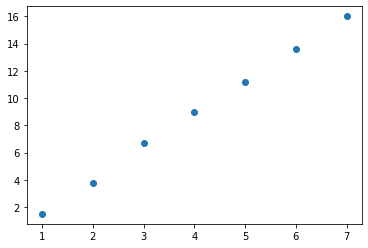

In [9]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

## 1.1 Estimate the slope  
$$y = mx + b$$  
We will show 2 equations to compute an approximation of the slope.

### Method 1 
$$
m = \frac{n \sum_{{i=1}}^{n} x_iy_i - \sum_{{i=1}}^{n} x_i  \sum_{{i=1}}^{n} y_i}{n \sum_{{i=1}}^{n} x^2_i - (\sum_{{i=1}}^{n} x_i )^2}
$$

#### 1.1.1 Compute required inputs for formula

In [57]:
df = pd.DataFrame({
    'X': X,
    'Y': Y,
    'XY': X * Y,
    'X**2': X**2
})
n = len(X)
print(f"n : {n}")
df

n : 7


,X,Y,XY,X**2
0,1,1.5,1.5,1
1,2,3.8,7.6,4
2,3,6.7,20.1,9
3,4,9.0,36.0,16
4,5,11.2,56.0,25
5,6,13.6,81.6,36
6,7,16.0,112.0,49


#### 1.1.2 Sum column wise

In [58]:
(X_sum, Y_sum, XY_sum, X_square_sum) = df.sum(axis=0)
print(f"X_sum : {X_sum}")
print(f"Y_sum : {Y_sum:.2f}")
print(f"XY_sum : {XY_sum}")
print(f"X_square_sum : {X_square_sum}")

X_sum : 28.0
Y_sum : 61.80
XY_sum : 314.8
X_square_sum : 140.0


#### 1.1.3 Compute m (the slope)

$$
m = \frac{7(314.8) - (28)(61.8)}{7(140) - (28)^2}
$$
$$$$
$$
m = \frac{473.2}{196}
$$
$$$$
$$
m = 2.414285714286
$$

In [54]:
rise_1 = n * XY_sum - X_sum * Y_sum
print(f"{rise_1:.2f}")

473.20


In [55]:
run_1 = n * X_square_sum - (X_sum)**2
print(f"{run_1:.2f}")

196.00


In [90]:
m_1 = rise_1/run_1
print(f"(method 1) m = {m_1:.12f}")

(method 1) m = 2.414285714286


### Method 2
$$
\frac{\sum_{{i=1}}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sum_{{i=1}}^{n} (x_i-\bar{x})^2}  
$$

#### 1.1.1 Compute required inputs for formula

In [74]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

print(f"X_mean : {X_mean:.2f}")
print(f"Y_mean : {Y_mean:.2f}")

X_mean : 4.00
Y_mean : 8.83


#### 1.1.2 Compute m (the slope) 

$$
m = \frac{67.6}{28}
$$
$$$$
$$
m = 2.414285714286
$$

In [83]:
rise_2 = np.sum((X - X_mean) * (Y - Y_mean))
rise_2

67.6

In [84]:
run_2 = np.sum((X - X_mean)**2)
run_2

28.0

In [91]:
m_2 = rise_2/run_2
print(f"(method 2) m = {m_2:.12f}")

(method 2) m = 2.414285714286


## 1.2 Estimate the y-intercept 
We will show 2 equations to compute an approximation of the y intercept.

### Method 1 
$$
b = \frac{\sum_{{i=1}}^{n} y_i - m\sum_{{i=1}}^{n} x_i}{n}
$$

In [92]:
b_1 = (Y_sum - m_1 * X_sum)/n
print(f"(method 1) b = {b_1:.12f}")

(method 1) b = -0.828571428571


### Method 2  
$$
b = \bar{y} - m\bar{x}
$$

In [93]:
b_2 = Y_mean - m_2 * X_mean
print(f"(method 2) b = {b_2:.12f}")

(method 2) b = -0.828571428571


## 1.3 Result   

$y = mx + b$  
$y \approx (2.4142857)x -0.82857$

In [118]:
Y_approximation = m_2*X + b_2

## Compute performance metrics & visualize results

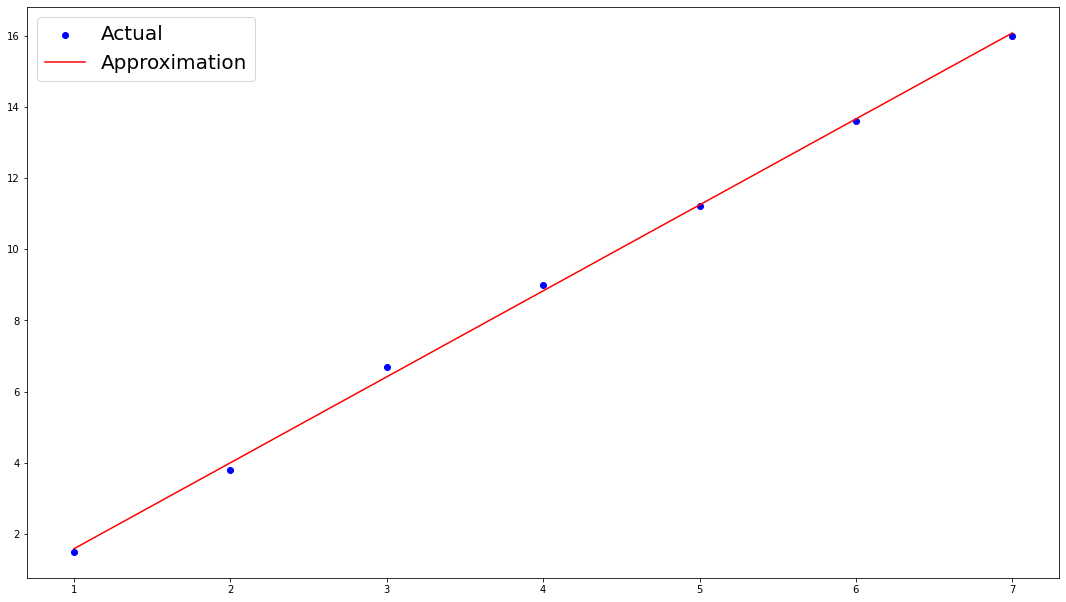

In [171]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.scatter(X, Y, color='b', label='Actual')
plt.plot(X, Y_approximation, color='r', label='Approximation')
plt.legend(fontsize=20)

In [172]:
squared_error = np.sum((Y - Y_approximation)**2)

In [173]:
mse = squared_error / n

In [174]:
rse = squared_error / (np.sum((Y - Y_mean)**2))

In [175]:
r_square = 1 - rse

In [178]:
pd.DataFrame({
    'R square': r_square,
    'MSE': mse,
},index=[0])

,R square,MSE
0,0.998968,0.024082
